/tmp/ipykernel_70283/3895723196.py:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(x=samples[:,0], y=samples[:,1], s=50,


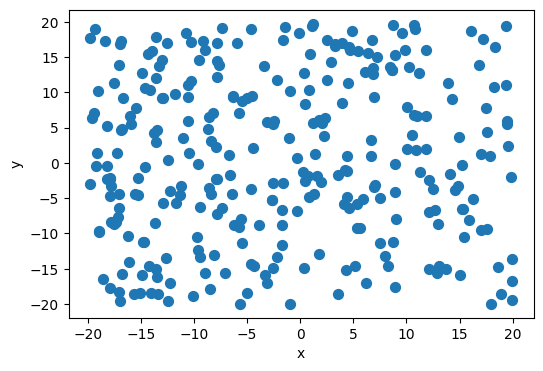

In [436]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

n_clusters = 3
n_samples = 300

def visualize_clusters(samples,labels=None):
    customcmap = ListedColormap(["crimson", "mediumblue", "darkmagenta"])
    fig, ax = plt.subplots(figsize=(6, 4))
    ax.scatter(x=samples[:,0], y=samples[:,1], s=50, 
                c=labels, cmap = customcmap)
    ax.set_xlabel(r'x', fontsize=10)
    ax.set_ylabel(r'y', fontsize=10)
    plt.xticks(fontsize=10)
    plt.yticks(fontsize=10)
    plt.show()

## 1: Randomly pick K points to place K centroids of K clusters

# Generate synthetic data using sklearn.datasets.make_blobs
# the first return value is the actual samples array, and the second return value is the integer label for cluster membership of each sample.
# samples, original_labels = make_blobs(n_samples=n_samples, centers=n_clusters, random_state=41)
# samples.shape: (300,2) 300 lines, 2 columns (because each element is a 2 dimensional point)
# labels.shape: (300,) = clusters to which the sample belong

samples = np.random.uniform(-20, 20, size=(n_samples,2))

# Visualize our samples
visualize_clusters(samples)

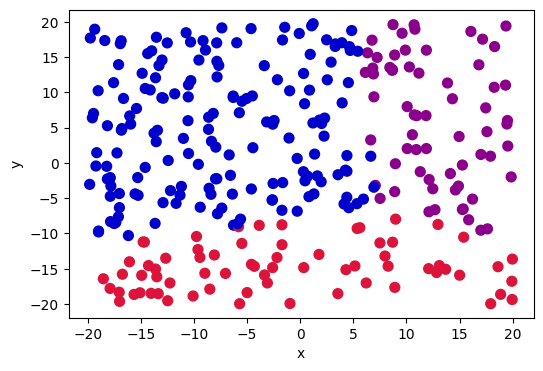

In [437]:
## 2: Randomly assign a centroid to each of the K clusters

# Initialize centroids randomly. The K centroids will be chosen randomly from the samples array, and will have size n_clusters
centroids = samples[np.random.choice(n_samples, n_clusters, replace=False)]
# centroids.shape: 3 lines, 2 columns (3 centroids, each centroid is 2 dimensional)
random_distances = np.linalg.norm(samples[:, np.newaxis] - centroids, axis=2)
random_labels = np.argmin(random_distances, axis=1)
visualize_clusters(samples,random_labels)

In [438]:

## 3: Calculate the distance of all observation to each of the K centroids

max_iters = 200

for _ in range(max_iters):
    # X[:, np.newaxis] 
    distances = np.linalg.norm(samples[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)
    new_centroids = np.array([samples[labels == i].mean(axis=0) for i in range(n_clusters)])
    if np.all(centroids == new_centroids):
        break
    centroids = new_centroids
# 

In [439]:
## 4: Assign every point to the closest centroid
distances = np.linalg.norm(samples[:, np.newaxis] - centroids, axis=2)
labels = np.argmin(distances, axis=1)

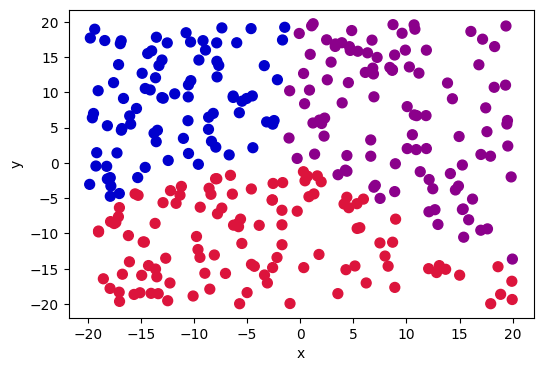

In [440]:
## 5: Repeat steps 3-4 until no point changes which centroid it belongs to.
visualize_clusters(samples,labels)